## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
file = r'F:\Data Analysis\Springboard\Data Science Career Track\16. LinkedIn Learning\Exercise Files\chapter4\04_02\poll.csv'

poll = pd.read_csv(file)

poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [8]:
s = sample(0.51,n=1000)

In [9]:
s.vote.value_counts(normalize=True)

Brown    0.526
Green    0.474
Name: vote, dtype: float64

In [10]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [11]:
dist.head()

,Brown,Green
vote,0.509,0.491
vote,0.509,0.491
vote,0.504,0.496
vote,0.506,0.494
vote,0.538,0.462


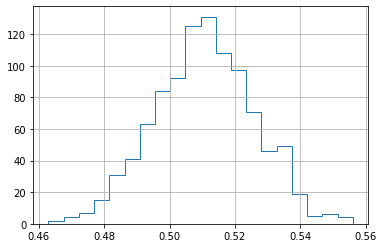

In [12]:
dist.Brown.hist(histtype='step',bins=20)

In [13]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [14]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [15]:
quantiles(0.50)

(0.468975, 0.531)

In [16]:
quantiles(0.48)

(0.447975, 0.511025)

In [17]:
quantiles(0.54)

(0.508, 0.571)

In [18]:
dist = samplingdist(0.50,10000)

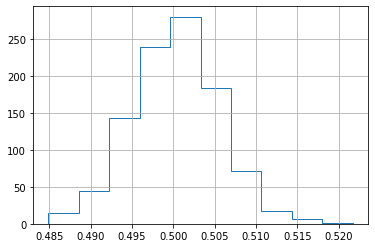

In [19]:
dist.Brown.hist(histtype='step')

In [20]:
largepoll = pd.read_csv('poll-larger.csv')

In [21]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64